In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("train.csv")

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
import matplotlib.pyplot as plt
from math import sqrt

In [12]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


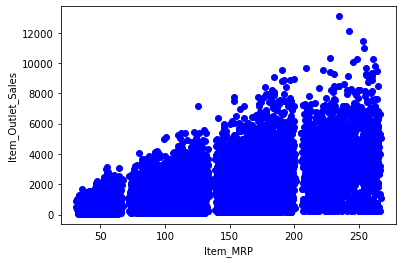

In [13]:
X = df[["Item_MRP", "Item_Outlet_Sales"]]
# Visualize data point
plt.scatter(X["Item_MRP"], X["Item_Outlet_Sales"], c="blue")
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.show()

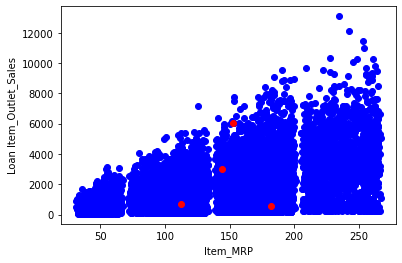

In [14]:
K=4
Centroids = (X.sample(n=K))
plt.scatter(X["Item_MRP"], X["Item_Outlet_Sales"], c="blue")
plt.scatter(Centroids["Item_MRP"], Centroids["Item_Outlet_Sales"], c="red")
plt.xlabel("Item_MRP")
plt.ylabel("Loan Item_Outlet_Sales")
plt.show()

In [15]:
Centroids

,Item_MRP,Item_Outlet_Sales
4984,112.1886,667.1316
769,143.9470,3006.0870
3866,152.6024,6072.0960
5224,181.6950,549.2850


In [16]:
diff = 1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Item_MRP"]-row_d["Item_MRP"])**2
            d2 = (row_c["Item_Outlet_Sales"]-row_d["Item_Outlet_Sales"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Item_Outlet_Sales","Item_MRP"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Item_Outlet_Sales'] - Centroids['Item_Outlet_Sales']).sum() + (Centroids_new['Item_MRP'] - Centroids['Item_MRP']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Item_Outlet_Sales","Item_MRP"]]

209.1679033005089
264.29961043903506
229.60356370101016
208.54309864040687
184.27110095540434
158.05000167685756
119.20059287137566
139.3082478945014
121.71801915236571
113.22607181070758
94.36397675538902
83.97078696381793
73.66666142677286
61.180088513100344
65.13304898361983
63.40134373057805
58.532609889673736
38.6303137156022
28.38764452999611
26.31843212225128
33.34952076146814
38.760999814367096
39.01563087837356
27.729911431564204
26.19560345208194
23.793018967022633
16.99103435889245
7.265070755684306
8.561041990549654
5.071980217455646
5.388744197655626
4.949421695221702
1.4148434280419195
0.0


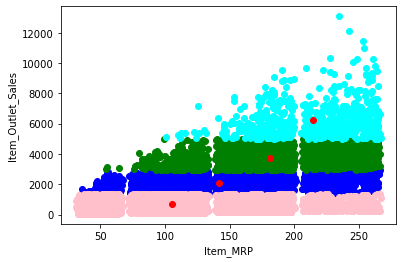

In [17]:
color=['blue','green','cyan','pink']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"],c=color[k])
plt.scatter(Centroids["Item_MRP"],Centroids["Item_Outlet_Sales"],c='red')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()